In [22]:
!pip install -U statsmodels

In [23]:
!pip install pmdarima

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

from sklearn.metrics import r2_score


In [5]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2022-01-06 09:40:36--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-01-06 09:40:37 (22.6 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]



In [6]:
df = pd.read_csv('perrin-freres-monthly-champagne.csv', index_col = 'Month',
                 skipfooter = 2, parse_dates = True)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


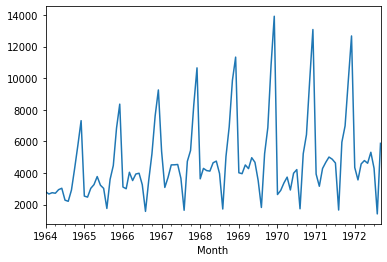

In [7]:
df.columns = ['Sales']
df['Sales'].plot();

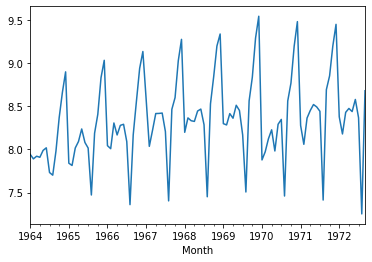

In [8]:
df['LogSales'] = np.log(df['Sales'])
df['LogSales'].plot();

In [9]:
df.index.freq = 'MS'

In [10]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [11]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

### Auto ARIMA

In [12]:
# Auto ARIMA Seasonal

model = pm.auto_arima(train['LogSales'],
                      trace = True, suppress_warning = True,
                      seasonal = True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.266, Time=2.05 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.40 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=1.28 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.66 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.39 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=0.88 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=2.97 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.40 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.123, Time=0.55 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.11 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

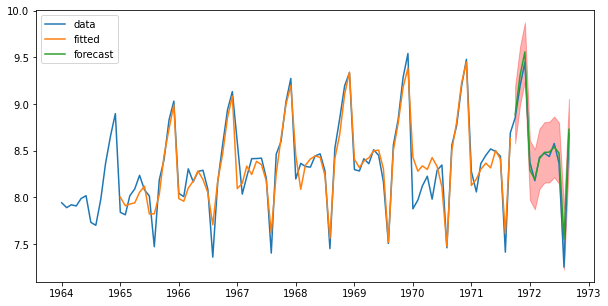

In [15]:
train_pred = model.predict_in_sample(start=12, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogSales'], label='data') # plot test data
ax.plot(train.index[12:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast') # plot test prediction
ax.fill_between(test.index, confint[:,0], confint[:,1],
                color = 'red', alpha = 0.3) # plot confidence bounds

ax.legend();

In [17]:
r2_score(test['Sales'], np.exp(test_pred))

0.9546942228798783

In [18]:
# Auto ARIMA Non-Seasonal

model = pm.auto_arima(train['LogSales'],
                      trace = True, max_p = 12, max_q = 2,
                      max_order = 14, suppress_warning = True,
                      stepwise = False, seasonal = False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.11 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.25 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.19 

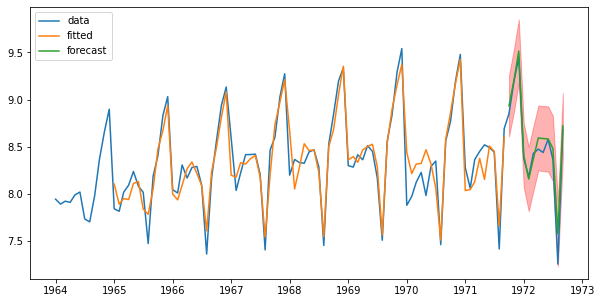

In [19]:
train_pred = model.predict_in_sample(start=12, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogSales'], label='data') # plot test data
ax.plot(train.index[12:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast') # plot test prediction
ax.fill_between(test.index, confint[:,0], confint[:,1],
                color = 'red', alpha = 0.3) # plot confidence bounds

ax.legend();

In [20]:
r2_score(test['Sales'], np.exp(test_pred))

0.9716946486242174

### ARIMA ACF PACF

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

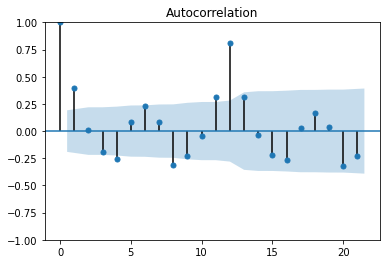

In [26]:
plot_acf(df['LogSales']);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


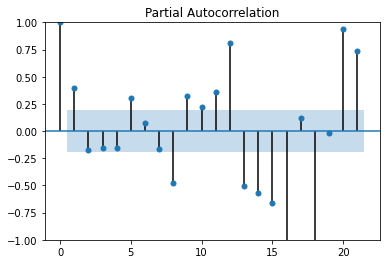

In [27]:
plot_pacf(df['LogSales']);

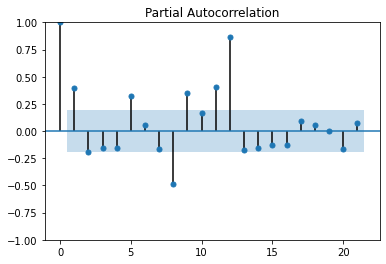

In [28]:
plot_pacf(df['LogSales'], method = 'ols');

### Stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Values:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [33]:
adf(df['LogSales'])

Test-Statistic: -2.255118601284435
P-Values: 0.18685173111687048
Non-Stationary


In [34]:
adf(df['LogSales'].diff().dropna())

Test-Statistic: -4.460914465253633
P-Values: 0.0002312140464953588
Stationary


In [39]:
def plot_fit_and_forecast(result, d = 0, col='Sales'):
  fig, ax = plt.subplots(figsize = (10, 5))
  # True values
  ax.plot(df[col], label = 'data')

  # Train predictions
  # Plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index[d:], train_pred[d:], color = 'green', label = 'fitted')

  # Obtain actual predicted value
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()

  # Assigning confidence intervals to variables
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label = 'forecast')

  # Plot confidence balance using plt's fill_between()
  ax.fill_between(test.index, lower, upper, color = "red", alpha = 0.3)
  ax.legend()

  return forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


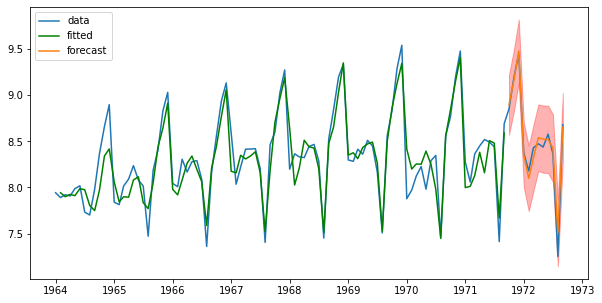

In [40]:
arima = ARIMA(train['LogSales'], order = (12, 1, 2))
arima_result = arima.fit()
forecast = plot_fit_and_forecast(arima_result, d = 1, col = 'LogSales')

In [41]:
r2_score(test['Sales'], np.exp(forecast))

0.9866622810089092